In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


from interpret.glassbox import LogisticRegression
from interpret import show

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../Processing/')

from preprocessing import Preprocess_English_Sentence,Preprocess_French_Sentence
from sklearn.feature_extraction.text import CountVectorizer

import wordcloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\theov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\theov\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\theov\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:

from sklearn.feature_extraction.text import CountVectorizer
with open("../Processing/vocab.txt", "r",encoding="utf-8")as f :
    vocab = f.read().split("\n")
    vectorizer = CountVectorizer(max_features=3000,vocabulary=vocab,stop_words="english",binary=True)


In [3]:
cyberpunk = pd.read_csv("../Processing/processed_files/wattpad/cyberpunk-encoded.csv")
space = pd.read_csv("../Processing/processed_files/wattpad/space-encoded.csv")
romance = pd.read_csv("../Processing/processed_files/wattpad/romance-encoded.csv")
crime = pd.read_csv("../Processing/processed_files/wattpad/crime-encoded.csv")

thriller = pd.read_csv("../Processing/processed_files/wattpad/thriller-encoded.csv")
vampire = pd.read_csv("../Processing/processed_files/wattpad/vampire-encoded.csv")
fantasy = pd.read_csv("../Processing/processed_files/wattpad/fantasy-encoded.csv")


science_fantasy = pd.read_csv("../Processing/processed_files/wattpad/science-fantasy-encoded.csv")
steampunk = pd.read_csv("../Processing/processed_files/wattpad/steampunk-encoded.csv")
horror = pd.read_csv("../Processing/processed_files/wattpad/horror-encoded.csv")

humour = pd.read_csv("../Processing/processed_files/wattpad/humour-encoded.csv")
dystopie = pd.read_csv("../Processing/processed_files/wattpad/dystopie-encoded.csv")

In [4]:
merge_df = cyberpunk.append(space).append(romance).append(crime).append(thriller).append(vampire).append(fantasy)
merge_df = merge_df.append(science_fantasy).append(steampunk).append(horror).append(humour).append(vampire).append(dystopie).sample(frac=1)

In [5]:
# Permet la suppression des histoires apparaissant dans deux genres différents
merge_df.drop_duplicates(subset=['story_id'],keep=False,inplace=True)
merge_df.drop(columns=["story_title","story_id"],inplace=True)

In [6]:
X = merge_df.drop(columns=["genre_text"])
y = merge_df["genre_text"]

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y_fit = le.transform(y)

In [8]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y_fit, test_size=0.20, random_state=seed)


In [9]:
clf = LogisticRegression(penalty="l1",solver="liblinear").fit(X_train, y_train)
clf.score(X_test, y_test)

0.45241317095173655

In [10]:
clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test)

D:\Logiciel\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4857916102841678

In [11]:
y1_0 = y.apply(lambda x : 1 if x == "cyberpunk" else 0)

In [12]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y1_0, test_size=0.20, random_state=seed)


In [13]:
clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test)

D:\Logiciel\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9350473612990527

In [14]:
clf = LogisticRegression(penalty="l1",solver="liblinear").fit(X_train, y_train)
clf.score(X_test, y_test)

0.9327920613441588

In [15]:
len(X)

11085

In [16]:
 ### Pour le nuage de mot
    
lr = LogisticRegression(random_state=seed, penalty='l1', solver='liblinear')
    
lr.fit(X_train, y_train)

score = lr.score(X_test, y_test)

lr_global = lr.explain_global(name="Logistic Regression")

lr_local = lr.explain_local(X_test, y_test, name="Logistic Regression")
    
words = merge_df.columns[0:3000]
scores = lr_global.data()["scores"]

res = {words[i]: scores[i] for i in range(len(words))}


idx_1 = np.array(scores) > 0
words_selected_1 = words[idx_1]

words_1 = {key: res[key] for key in words_selected_1}
wc1 = wordcloud.WordCloud(
    background_color = 'white', 
    max_words=200,
    max_font_size=100).generate_from_frequencies(words_1)

idx_2 = np.array(scores) < 0
words_selected_2 = words[idx_2]

words_2 = {key: res[key]*-1 for key in words_selected_2}
wc2 = wordcloud.WordCloud(
    background_color = 'white', 
    max_words=200,
    max_font_size=100).generate_from_frequencies(words_2)


In [17]:
score

0.9327920613441588

(-0.5, 399.5, 199.5, -0.5)

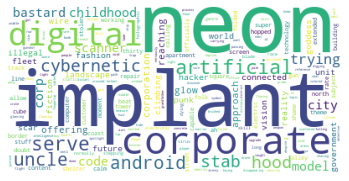

In [18]:
plt.imshow(wc1)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

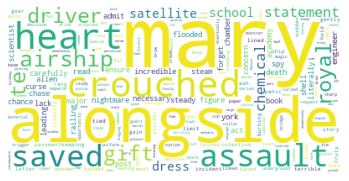

In [19]:
plt.imshow(wc2)
plt.axis('off')

In [20]:
f=open("neuromancien.txt", 'r')
content = f.read()
process_content = Preprocess_English_Sentence(content)

In [21]:
process_content

'sky port color television tuned dead channel like case someone say shouldered way crowd around door chat like body massive drug deficiency sprawl voice sprawl joke bar professional expatriate could drink week never hear two word tending bar prosthetic arm monotonously filled tray glass draft saw case teeth web work east steel brown decay case found place bar unlikely tan one zone whore crisp naval uniform tall whose cheekbone ridged precise row tribal scar wage early two joe boy said draft across bar good hand maybe business case case girl right bartender smile ugliness stuff legend age affordable beauty something heraldic lack antique arm another mug military prosthesis manipulator cased grubby pink plastic much artiste case sound laughter overhang belly pink claw artiste slightly funny deal sure case said beer somebody got ta funny around sure whore giggle went octave either sister vanish zone he close personal friend mine case eye made possible spitting sound lip barely moving left

In [22]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(lr, open(filename, 'wb'))

In [23]:
lr.pre

AttributeError: 'LogisticRegression' object has no attribute 'pre'

In [ ]:
import os
os.listdir()

In [ ]:
f = open("neuromancien.txt", "r")
content = f.read()
process_content = Preprocess_French_Sentence(content)

matrix = vectorizer.fit_transform([process_content])

lr.predict(matrix.todense())

In [ ]:
f = open("Altered-Carbon-_Takeshi-Kovacs_-Book-1_-_Richard-K.-Morgan_-_z-lib.org_.txt", "r",encoding="utf-8")
content = f.read()
process_content = Preprocess_French_Sentence(content)

matrix = vectorizer.fit_transform([process_content])

lr.predict(matrix.todense())

In [ ]:
pd.DataFrame(matrix.todense())

In [ ]:
lr_local = lr.explain_local(pd.DataFrame(matrix.todense()), name="Logistic Regression")

In [ ]:
lr_local.data(0)["perf"]["predicted_score"]

In [ ]:
import plotly_express as px

In [ ]:
df = pd.DataFrame({"Word":lr_global.data()["names"],"Score":lr_global.data()["scores"]},index=lr_global.data()["names"])

In [ ]:
df["Abs_score"]=df["Score"].apply(abs)

In [ ]:
df["Color"] = df["Score"].apply(lambda x : 1 if x > 0 else 0)

In [ ]:
df = df.sort_values("Abs_score",ascending=True)

In [ ]:
def getPredictionFromNumber(number):
    if number == 1 :
        return "Cyberpunk"
    else : 
        return "Not Cyberpunk"

In [ ]:
len(data)

In [54]:
import plotly_express as px
data = df[df["Score"]!=0]
fig = px.bar(data,  y='Word',x='Score', color="Color", orientation='h',
            color_continuous_scale='Bluered_r')
fig.update(layout_coloraxis_showscale=False)
fig.update_yaxes(range=[len(data)-60, len(data)])
fig.update_layout(title={"text":"ee"})
fig.show()

In [ ]:
show(lr_local)

In [ ]:
show([lr_local])

In [69]:
import pandas as pd
import plotly.express as px
import numpy as np

deciles = pd.read_csv('https://github.com/ngpsu22/2016-2018-ASEC-/raw/master/deciles.csv')

# here you define the color
deciles["color"] = np.where(deciles["percent_change"] >= 0, 'green', "red")

fig = px.bar(deciles, x="deciles", y="percent_change",
             text='percent_change',
             color='color',
             height=800,
             labels={"percent_change": "Percent change",
                     "deciles": "Decile"
                 },)\
        .update_traces(showlegend=False) # you don't need legend in this case

fig.update_layout(
    title='Average percent change in real resources per person',
    title_x=0.5, # title is nicer if centered
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Percent change in real resources',
        titlefont_size=16,
        tickfont_size=14))
fig.update_traces(textposition='outside')
fig.update_traces(texttemplate='%{text}%')
fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide', xaxis_tickfont_size=16)
fig.show()


In [ ]:
!pip install raiwidgets

In [ ]:
vectorizer

In [ ]:
f = open('../Emmys_book/2000 -/Thin-Air-Richard-Morgan.txt', 'r',encoding="utf-8")


In [14]:
content = f.read()


In [15]:
process_content = Preprocess_French_Sentence(content)

In [16]:
process_content

'richard air traduit ’ anglais mémoire musicien artiste ami affrontait démon terrifiants ’ a jamais cessé combattre persuadé victoire bout sans avoir conscience trésor courage force détermination ’ jetait chaque jour bataille temps ainsi gagné a permis créer magnifiques « sans frontière ver laquelle tendre souffle a donné naissance culture humaniste progressiste représentée depuis deux siècle point ’ éteindre ’ agit seulement ’ perte nationale progrès humain a besoin ’ aucune pointe ’ horizon création ’ nouvelle frontière représente donc nécessité sociale impérieuse foi ’ humanité… crois seule peut offrir cette nouvelle frontière » robert cap « loin ’ imagerie romantique entoure ’ ordinaire colonisation européen continent américain symbole plus réaliste illustrer cette période assurément gros tas crâne » « organisation créée toutes pièce toujours menacée ’ effondrement car repose mythe mythe disparaissent dès gens cessent ’ croire » brève histoire ’ partie blues noire « réveil ’ accomp

In [44]:
matrix = vectorizer.fit_transform([process_content])

lr.predict(matrix.todense())

array([1], dtype=int64)

In [46]:
le.inverse_transform(lr.predict(matrix.todense()))

array(['cyberpunk'], dtype=object)

In [ ]:

df = pd.read_json('processed_files/wattpad/'+genre+'-preprocessed.json',orient="record")

matrix = vectorizer.fit_transform(df["preprocess_story_text"])
count_vect_df = pd.DataFrame(matrix.todense(), columns=vectorizer.get_feature_names())

count_vect_df["genre_text"] = genre
count_vect_df["story_title"] = df["story_title"]
count_vect_df["story_id"] = df["story_id"]

csv_dump = count_vect_df.to_csv(index=False,path_or_buf='processed_files/wattpad/'+genre+'-encoded.csv')

json_dump = count_vect_df.to_json(path_or_buf='processed_files/wattpad/'+genre+'-encoded.json',orient = 'records',indent=1)

In [69]:
!pip install translate

In [20]:
process_content[0:100]

'richard air traduit ’ anglais mémoire musicien artiste ami affrontait démon terrifiants ’ a jamais c'

In [75]:
content[0:50]

' \nRichard Morgan\nThin Air\nTraduit de l’anglais (Gr'

In [22]:
from translate import Translator
translator= Translator(from_lang="french",to_lang="english")

translation = translator.translate("ami")
print(translation)

friend


In [23]:
!pip install deep-translator

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda 4.10.3 requires ruamel_yaml_conda>=0.11.14, which is not installed.
okpy 1.18.1 requires certifi==2019.11.28, but you have certifi 2021.5.30 which is incompatible.
okpy 1.18.1 requires requests==2.22.0, but you have requests 2.27.1 which is incompatible.
okpy 1.18.1 requires urllib3==1.25.7, but you have urllib3 1.25.11 which is incompatible.



  Attempting uninstall: requests
    Found existing installation: requests 2.22.0
    Uninstalling requests-2.22.0:
      Successfully uninstalled requests-2.22.0


In [29]:
from deep_translator import GoogleTranslator
to_translate = 'Bonjour'
translated = GoogleTranslator(source='auto', target='en').translate(to_translate)

In [30]:
translated

'Hello'

In [34]:
content[0:500]

' \nRichard Morgan\nThin Air\nTraduit de l’anglais (Grande-Bretagne) par Claude Mamier\nBragelonne SF \nÀ la mémoire de Gilbert Scott,\nmusicien, artiste, ami.\n \nIl affrontait des démons terrifiants,\nmais n’a jamais cessé de les combattre,\npersuadé que la victoire était au bout,\nsans même avoir conscience des trésors\nde courage, de force et de détermination\nqu’il jetait chaque jour dans la bataille.\n \nLe temps ainsi gagné lui a permis\nde créer des œuvres magnifiques. \n« Sans une frontière vers laquelle'

In [33]:
GoogleTranslator(source='auto', target='en').translate(content[0:500])

'Richard Morgan\nThin Air\nTranslated from English (Great Britain) by Claude Mamier\nBragelonne\nIn memory of Gilbert Scott,\nmusician, artist, friend.\n \nHe faced terrifying demons,\nbut never stopped fighting them,\nconvinced that victory was at the end,\nwithout even being aware of the treasures\ncourage, strength and determination\nwhich he threw into battle every day.\n \nThe time thus saved allowed him\nto create beautiful works.\n“Without a border towards which'

In [37]:
tr_content = GoogleTranslator(source='auto', target='en').translate(content[0:4999])

In [38]:
tr_content += GoogleTranslator(source='auto', target='en').translate(content[5000:9999])

In [39]:
tr_content += GoogleTranslator(source='auto', target='en').translate(content[10000:14999])

In [41]:
tr_content += GoogleTranslator(source='auto', target='en').translate(content[15000:19999])

In [49]:
tr_content = ""
range_pos = range(0,len(content)+5000,5000)
for i,range_ in enumerate( range_pos ):
    
    tr_content += GoogleTranslator(source='auto', target='en').translate(content[range_:range_pos[i+1]-1])

IndexError: range object index out of range

In [53]:
len(content)

989292

In [54]:
tr_content += GoogleTranslator(source='auto', target='en').translate(content[985000:989292])

In [55]:
len(tr_content)

872832

In [56]:
Preprocess_English_Sentence(tr_content)

'morgan thin air great memory gilbert musician artist friend faced terrifying demon never stopped fighting convinced victory end without even aware treasure courage strength determination threw battle every day time thus saved create beautiful work without frontier strive breath gave birth humanist progressive culture two century united state verge extinction national loss human progress need vanguard none appear horizon creation new border therefore social necessity compelling united state humanity… believe mar offer u new frontier » heading mar far heroic romantic imagery usually surround colonization continent realistic symbol illustrate period would certainly large pile skull » e holocaust organization scratch always collapse based myth myth disappear soon people stop believing » brief history one e blue de la « awakening usually mixture intense joy obsessive concentration stress mild nausea feeling integral part job heat might well get used another integral part work revival take 

In [58]:
matrix = vectorizer.fit_transform([Preprocess_English_Sentence(tr_content)])


In [60]:
matrix.todense()

matrix([[0, 1, 1, ..., 1, 0, 1]], dtype=int64)

In [63]:
process_content
clf.predict(matrix.todense())

array([0], dtype=int64)

In [42]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
lr = pickle.load(open(filename, 'rb'))

lr_global = lr.explain_global(name="Logistic Regression")

df = pd.DataFrame({"Word":lr_global.data()["names"],"Score":lr_global.data()["scores"]},index=lr_global.data()["names"])

df["Abs_score"]=df["Score"].apply(abs)

df["Color"] = df["Score"].apply(lambda x : 1 if x > 0 else 0)

df = df.sort_values("Abs_score",ascending=True)

import plotly_express as px
data = df[df["Score"]!=0]
fig = px.bar(data,  y='Word',x='Score', color="Color", orientation='h',
            color_continuous_scale='Bluered_r')
fig.update(layout_coloraxis_showscale=False)
fig.update_yaxes(range=[len(data)-60, len(data)])
fig.update_layout(title={"text":"Récapitulatif des mots significatif du cyberpunk (bleu) contre ceux s'en éloignant"})

D:\Logiciel\Anaconda\lib\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

